In [88]:
%matplotlib inline

In [89]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 


In [90]:
df=pd.read_excel("data/laser.ods",dtype=float)
df["I"]*=10**(df["nd"])
df["I2"]*=10**(df["nd2"])

In [101]:
sin_f = lambda beta,alpha,offset, amp: amp*np.sin((beta-alpha)/180*2*np.pi)+offset
popt,pcov = curve_fit(sin_f,df["angle"],df["I"],p0=[0,4000,3000])
fit_f= lambda beta:sin_f(beta,popt[0],popt[1],popt[2])

popt2,pcov2 = curve_fit(sin_f,df["angle2"][:18],df["I2"][:18],p0=[0,4000,3000])
fit_f2= lambda beta:sin_f(beta,popt2[0],popt2[1],popt2[2])

angles_arr=np.arange(0,181,1)
angles_arr2=np.arange(115,160,1)

In [102]:
imax=max(df["I"])
imin=min(df["I"])
plin=(imax-imin)/(imax+imin)

In [105]:
I0=popt[1]*2
eta=np.arccos(popt[2]/popt[1])/2*180/np.pi

alpha=popt[0]+45
alpha2=popt2[0]+45
eta2=alpha2-alpha

In [106]:
print(f"Der Linearisationsgerad beträgt {plin}")
print(f"eta ist in grad {eta}")
print(f"eta2 ist in grad {eta2}")
print(f"alpha ist in grad {alpha}")
print(f"alpha2 ist in grad {alpha2}")

Der Linearisationsgerad beträgt 0.9538968166849616
eta ist in grad 9.158519025079901
eta2 ist in grad 7.343223109134456
alpha ist in grad 49.82398615821384
alpha2 ist in grad 57.1672092673483


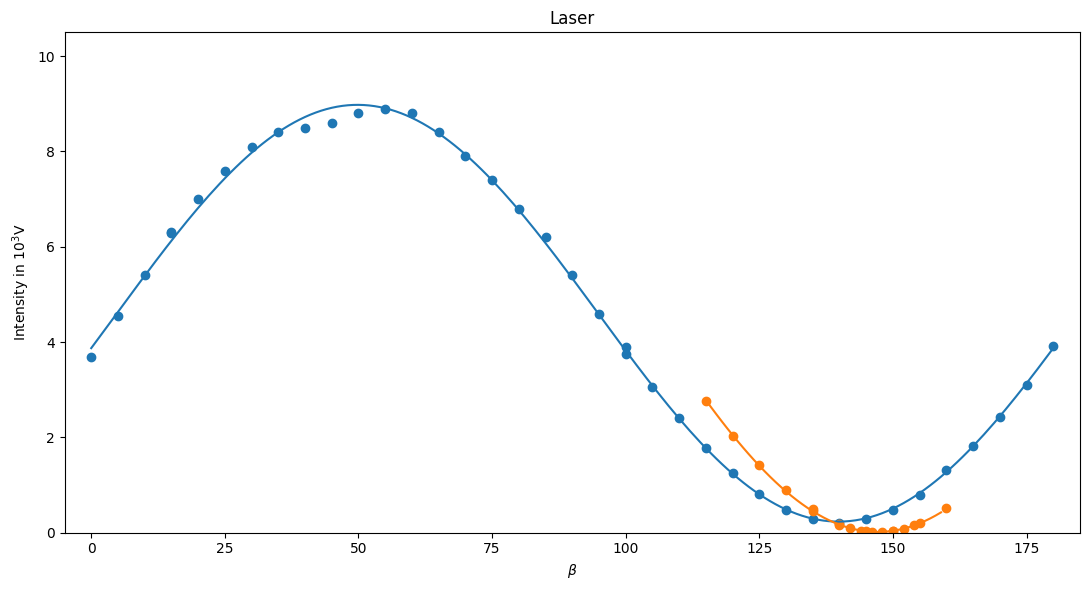

array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.])

In [107]:


fig = plt.figure(figsize=(11, 6))
gs = GridSpec(8, 5)
fig1 = fig.add_subplot(gs[:, :])
fig1.set_title(f"Laser")
fig1.set_ylabel("Intensity in $10^3$V")
fig1.set_xlabel("$\\beta$")
fig1.set_xlim(-5,185)
fig1.set_ylim(0,10.5)
fig1.scatter(df["angle"],df["I"]*1e-3)
fig1.scatter(df["angle2"],df["I2"]*1e-3)
fig1.plot(angles_arr,fit_f(angles_arr)*1e-3)
fig1.plot(angles_arr2,fit_f2(angles_arr2)*1e-3)
plt.tight_layout()
# plt.savefig(f"plots/{title}.pdf")
plt.show()
fig1.get_xticks()